In [87]:
import numpy as np

import requests
import re
import time
import os
import pandas as pd
import pickle

from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
from selenium import webdriver
from selenium.webdriver.common.keys import Keys


import diagnostic_plots
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
% matplotlib inline

In [88]:
#save to pick for efficiency



filename_berkely = '/Users/xzhou/github/project_files/project_luther/professor_data_berkely.pkl' #3986 records
filename_nyu = '/Users/xzhou/github/project_files/project_luther/professor_data_nyu.pkl' #5607 records
filename_uf = '/Users/xzhou/github/project_files/project_luther/professor_data_uf.pkl' #5307 records

df_berkely=pd.read_pickle(filename_berkely)
df_nyu=pd.read_pickle(filename_nyu)
df_uf=pd.read_pickle(filename_uf)

In [89]:
print(df_berkely.shape)
print(df_nyu.shape)
print(df_uf.shape)

(3986, 24)
(5607, 24)
(5306, 24)


In [90]:
# define key for each section. This would be used for future references. 
dfs=pd.concat([df_berkely, df_nyu, df_uf],keys=['berkely', 'nyu', 'uf'])
dfs.shape

(14899, 24)

In [91]:
dfs.loc['berkely']


Name  Rating  Level of difficulty  Total reviews  \
0             Jerry Sanders     2.7                  3.4             75   
1              Chris Dolder     4.8                  3.9              9   
2              Bob Calonico     4.7                  1.6             29   
3               Zack Powell     2.1                  3.0             15   
4               Mary Kelsey     4.6                  1.6             63   
5               John Searle     3.6                  3.1             47   
6              Jean Frechet     4.4                  3.3            143   
7             Phillip Stark     2.9                  3.0             61   
8             William Hanks     4.4                  2.2             25   
9            Nelson Graburn     2.8                  3.0             39   
10               John Hayes     4.2                  3.5             32   
11           Rosemary Joyce     4.1                  2.7             22   
12           Jonathan Spiro     5.0                  1.8             14   
13              John Bishop     3.9                  2.8             47   
14            Stephen Booth     3.6                  2.9             33   
15          Alex Filippenko     4.5                  2.6            237   
16             Teresa Smith     3.6                  3.4             10   
17       Sidsel Millerstrom     2.3                  2.3              3   
18            Darcy Grigsby     4.4                  3.3             43   
19            Mark Strovink     4.3                  3.7             10   
20         Garrison Sposito     3.8                  3.0             18   
21             Leon Litwack     3.8                  2.9             71   
22           Suzanne Popkin     4.0                  2.4             14   
23              Alan Karras     3.8                  3.2             61   
24               Alan Smith     2.4                  3.8              6   
25            Kai Ping Peng     3.8                  1.8             18   
26             Brian Barsky     4.3                  2.6             10   
27       Donald Mastronarde     2.7                  3.6             35   
28           Alan Weinstein     3.0                  3.1             23   
29      John "Jack" Wagoner     2.0                  3.2             63   
...                     ...     ...                  ...            ...   
3956           Tom McEnaney     5.0                  3.0              1   
3957                            0.0                  2.5              0   
3958           Anne Collins     1.0                  4.0              1   
3959       Hassan Rezakhany     1.0                  3.0              1   
3960           Laura Wagner     3.0                  5.0              1   
3961  Maria Barrios-Leblanc     5.0                  1.0              1   
3962                            0.0                  2.5              0   
3963           Edwin Ochong     4.0                  2.0              1   
3964       Zachary Manfredi     5.0                  4.0              1   
3965                            0.0                  2.5              0   
3966                            0.0                  2.5              0   
3967                            0.0                  2.5              0   
3968                            0.0                  2.5              0   
3969                            0.0                  2.5              0   
3970         Stephen Torres     5.0                  4.0              1   
3971          Abhijeet Paul     5.0                  2.0              1   
3972       Nathalie Khankan     5.0                  3.0              1   
3973          Amel Belguith     3.0                  5.0              1   
3974                            0.0                  2.5              0   
3975                            0.0                  2.5              0   
3976                            0.0                  2.5              0   
3977                            0.0             

In [92]:
#check for null values
dfs.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14899 entries, (berkely, 0) to (uf, 5305)
Data columns (total 24 columns):
Name                           14899 non-null object
Rating                         14899 non-null float64
Level of difficulty            14899 non-null float64
Total reviews                  14899 non-null int64
Accessible outside class       14899 non-null float64
Amazing lectures               14899 non-null float64
Beware of pop quizzes          14899 non-null float64
Caring                         14899 non-null float64
Clear grading criteria         14899 non-null float64
Extra credit                   14899 non-null float64
Get ready to read              14899 non-null float64
Gives good feedback            14899 non-null float64
Graded by few things           14899 non-null float64
Group projects                 14899 non-null float64
Hilarious                      14899 non-null float64
Inspirational                  14899 non-null float64
Lecture heavy 

In [93]:
dfs.columns

Index(['Name', 'Rating', 'Level of difficulty', 'Total reviews',
       'Accessible outside class', 'Amazing lectures', 'Beware of pop quizzes',
       'Caring', 'Clear grading criteria', 'Extra credit', 'Get ready to read',
       'Gives good feedback', 'Graded by few things', 'Group projects',
       'Hilarious', 'Inspirational', 'Lecture heavy', 'Lots of homework',
       'Participation matters', 'Respected', 'Skip class? you won't pass.',
       'So many papers', 'Test heavy', 'Tough grader'],
      dtype='object')

In [94]:
# noted records with no professor name
dfs.tail()

Name  Rating  Level of difficulty  Total reviews  \
uf 5301                        0.0                  2.5              0   
   5302                        0.0                  2.5              0   
   5303  Tina D'Allesandro     4.0                  3.0              1   
   5304          Kay Leary     5.0                  3.0              1   
   5305      Lisa Domenico     4.0                  5.0              1   

         Accessible outside class  Amazing lectures  Beware of pop quizzes  \
uf 5301                       0.0               0.0                    0.0   
   5302                       0.0               0.0                    0.0   
   5303                       0.0               0.0                    0.0   
   5304                       0.0               0.0                    0.0   
   5305                       0.0               0.0                    0.0   

         Caring  Clear grading criteria  Extra credit      ...       \
uf 5301     0.0                    0.00           0.0      ...        
   5302     0.0                    0.00           0.0      ...        
   5303     0.0                    0.00           0.0      ...        
   5304     0.0                    0.33           0.0      ...        
   5305     0.0                    0.00           0.0      ...        

         Hilarious  Inspirational  Lecture heavy  Lots of homework  \
uf 5301        0.0            0.0            0.0               0.0   
   5302        0.0            0.0            0.0               0.0   
   5303        0.0            0.0            0.0               0.0   
   5304        0.0            0.0            0.0               0.0   
   5305        0.0            0.0            0.0               0.0   

         Participation matters  Respected  Skip class? you won't pass.  \
uf 5301                   0.00        0.0                          0.0   
   5302                   0.00        0.0                          0.0   
   5303                   0.33        0.0                          0.0   
   5304                   0.00        0.0                          0.0   
   5305                   0.33        0.0                          0.0   

         So many papers  Test heavy  Tough grader  
uf 5301             0.0         0.0           0.0  
   5302             0.0         0.0           0.0  
   5303             0.0         0.0           0.0  
   5304             0.0         0.0           0.0  
   5305             0.0         0.0           0.0  

[5 rows x 24 columns]

In [95]:
# check how many recoard are associated with no professor name
dfs[dfs['Name']=='']

Name  Rating  Level of difficulty  Total reviews  \
berkely 244           0.0                  2.5              0   
        274           0.0                  2.5              0   
        376           0.0                  2.5              0   
        416           0.0                  2.5              0   
        478           0.0                  2.5              0   
        530           0.0                  2.5              0   
        565           0.0                  2.5              0   
        674           0.0                  2.5              0   
        694           0.0                  2.5              0   
        768           0.0                  2.5              0   
        782           0.0                  2.5              0   
        783           0.0                  2.5              0   
        801           0.0                  2.5              0   
        850           0.0                  2.5              0   
        906           0.0                  2.5              0   
        935           0.0                  2.5              0   
        1035          0.0                  2.5              0   
        1051          0.0                  2.5              0   
        1067          0.0                  2.5              0   
        1085          0.0                  2.5              0   
        1105          0.0                  2.5              0   
        1115          0.0                  2.5              0   
        1128          0.0                  2.5              0   
        1150          0.0                  2.5              0   
        1227          0.0                  2.5              0   
        1315          0.0                  2.5              0   
        1390          0.0                  2.5              0   
        1392          0.0                  2.5              0   
        1393          0.0                  2.5              0   
        1441          0.0                  2.5              0   
...           ...     ...                  ...            ...   
uf      5247          0.0                  2.5              0   
        5253          0.0                  2.5              0   
        5254          0.0                  2.5              0   
        5263          0.0                  2.5              0   
        5266          0.0                  2.5              0   
        5268          0.0                  2.5              0   
        5269          0.0                  2.5              0   
        5270          0.0                  2.5              0   
        5272          0.0                  2.5              0   
        5273          0.0                  2.5              0   
        5274          0.0                  2.5              0   
        5275          0.0                  2.5              0   
        5278          0.0                  2.5              0   
        5279          0.0                  2.5              0   
        5282          0.0                  2.5              0   
        5285          0.0                  2.5              0   
        5286          0.0                  2.5              0   
        5287          0.0                  2.5              0   
        5288          0.0                  2.5              0   
        5289          0.0                  2.5              0   
        5291          0.0                  2.5              0   
        5294          0.0                  2.5              0   
        5295          0.0                  2.5              0   
        5296          0.0                  2.5              0   
        5297          0.0                  2.5              0   
        5298          0.0                  2.5              0   
        5299          0.0                  2.5              0   
        5300          0.0                  2.5              0   
        5301          0.0                  2.5              0   
        5302          0.0                  2.5  

In [96]:
dfs_smaller=dfs[dfs.Name!=""]
dfs_smaller.shape

(13238, 24)

In [97]:
dfs_smaller.describe()

Rating  Level of difficulty  Total reviews  \
count  13238.000000         13238.000000   13238.000000   
mean       3.797401             2.901148       9.975525   
std        1.033064             0.909378      18.740137   
min        1.000000             1.000000       1.000000   
25%        3.100000             2.300000       2.000000   
50%        4.000000             3.000000       5.000000   
75%        4.600000             3.500000      11.000000   
max        5.000000             5.000000     507.000000   

       Accessible outside class  Amazing lectures  Beware of pop quizzes  \
count              13238.000000      13238.000000           13238.000000   
mean                   0.018514          0.029507               0.004915   
std                    0.063042          0.084010               0.036801   
min                    0.000000          0.000000               0.000000   
25%                    0.000000          0.000000               0.000000   
50%                    0.000000          0.000000               0.000000   
75%                    0.000000          0.000000               0.000000   
max                    1.000000          1.000000               1.000000   

            Caring  Clear grading criteria  Extra credit  Get ready to read  \
count  13238.00000            13238.000000  13238.000000        13238.00000   
mean       0.04185                0.023120      0.009057            0.03840   
std        0.10303                0.079273      0.048266            0.10168   
min        0.00000                0.000000      0.000000            0.00000   
25%        0.00000                0.000000      0.000000            0.00000   
50%        0.00000                0.000000      0.000000            0.00000   
75%        0.00000                0.000000      0.000000            0.00000   
max        1.00000                1.000000      1.000000            1.00000   

           ...          Hilarious  Inspirational  Lecture heavy  \
count      ...       13238.000000   13238.000000   13238.000000   
mean       ...           0.022012       0.029074       0.024260   
std        ...           0.074994       0.082168       0.085829   
min        ...           0.000000       0.000000       0.000000   
25%        ...           0.000000       0.000000       0.000000   
50%        ...           0.000000       0.000000       0.000000   
75%        ...           0.000000       0.000000       0.000000   
max        ...           1.000000       1.000000       1.000000   

       Lots of homework  Participation matters     Respected  \
count      13238.000000           13238.000000  13238.000000   
mean           0.023156               0.032918      0.037072   
std            0.078951               0.092945      0.093580   
min            0.000000               0.000000      0.000000   
25%            0.000000               0.000000      0.000000   
50%            0.000000               0.000000      0.000000   
75%            0.000000               0.000000      0.000000   
max            1.000000               1.000000      1.000000   

       Skip class? you won't pass.  So many papers    Test heavy  Tough grader  
count                 13238.000000    13238.000000  13238.000000  13238.000000  
mean                      0.027290        0.006304      0.007747      0.040504  
std                       0.082422        0.039248      0.042733      0.113506  
min                       0.000000        0.000000      0.000000      0.000000  
25%                       0.000000        0.000000      0.000000      0.000000  
50%                       0.000000        0.000000      0.000000      0.000000  
75%                       0.000000        0.000000      0.000000      0.000000  
max                       1.000000        0.500000      1.000000      1.000000  

[8 rows x 23 columns]

In [98]:
dfs_name_dropped=dfs_smaller.drop(['Name'], axis=1)
dfs_name_dropped.head()

Rating  Level of difficulty  Total reviews  \
berkely 0     2.7                  3.4             75   
        1     4.8                  3.9              9   
        2     4.7                  1.6             29   
        3     2.1                  3.0             15   
        4     4.6                  1.6             63   

           Accessible outside class  Amazing lectures  Beware of pop quizzes  \
berkely 0                      0.00              0.00                    0.0   
        1                      0.00              0.00                    0.0   
        2                      0.05              0.00                    0.0   
        3                      0.00              0.00                    0.0   
        4                      0.04              0.04                    0.0   

           Caring  Clear grading criteria  Extra credit  Get ready to read  \
berkely 0    0.00                    0.00          0.00               0.00   
        1    0.00                    0.00          0.00               0.00   
        2    0.26                    0.00          0.00               0.00   
        3    0.00                    0.00          0.00               0.00   
        4    0.12                    0.08          0.27               0.04   

               ...       Hilarious  Inspirational  Lecture heavy  \
berkely 0      ...            0.00           0.00           0.00   
        1      ...            0.00           0.50           0.00   
        2      ...            0.26           0.32           0.00   
        3      ...            0.00           0.00           0.00   
        4      ...            0.00           0.08           0.04   

           Lots of homework  Participation matters  Respected  \
berkely 0               0.0                   0.00       0.00   
        1               0.0                   0.00       0.00   
        2               0.0                   0.00       0.11   
        3               0.0                   0.00       0.00   
        4               0.0                   0.08       0.12   

           Skip class? you won't pass.  So many papers  Test heavy  \
berkely 0                         0.00             0.0         0.0   
        1                         0.00             0.0         0.0   
        2                         0.00             0.0         0.0   
        3                         0.00             0.0         0.0   
        4                         0.04             0.0         0.0   

           Tough grader  
berkely 0          0.00  
        1          0.00  
        2          0.00  
        3          0.00  
        4          0.04  

[5 rows x 23 columns]

In [99]:
dfs_smaller.insert(4,'Total score for Tags', dfs_smaller.sum(axis=1)-dfs_smaller['Rating']-dfs_smaller['Level of difficulty']-dfs_smaller['Total reviews'])


In [100]:
dfs_smaller.shape

(13238, 25)

In [101]:
dfs_cleaned=dfs_smaller[dfs_smaller['Total score for Tags']>0.9]
dfs_cleaned

Name  Rating  Level of difficulty  \
berkely 1                Chris Dolder     4.8                  3.9   
        2                Bob Calonico     4.7                  1.6   
        4                 Mary Kelsey     4.6                  1.6   
        5                 John Searle     3.6                  3.1   
        8               William Hanks     4.4                  2.2   
        10                 John Hayes     4.2                  3.5   
        11             Rosemary Joyce     4.1                  2.7   
        15            Alex Filippenko     4.5                  2.6   
        16               Teresa Smith     3.6                  3.4   
        18              Darcy Grigsby     4.4                  3.3   
        20           Garrison Sposito     3.8                  3.0   
        23                Alan Karras     3.8                  3.2   
        27         Donald Mastronarde     2.7                  3.6   
        30            Christina Romer     4.3                  3.3   
        32                Michael Omi     4.3                  2.5   
        34                  Gary Wren     3.6                  2.9   
        42            Jeffrey Perloff     3.7                  2.8   
        46             David Robinson     3.5                  3.0   
        49              T. Don Tilley     2.7                  3.2   
        50              F. Dean Toste     3.7                  3.3   
        55         Anne-Lise Francois     3.0                  3.1   
        59              Kevis Goodman     4.7                  3.3   
        60            Patricia Hilden     3.0                  2.8   
        63               Martha Olney     4.3                  3.4   
        65                 John Steel     2.6                  2.8   
        67                Anne Nesbet     4.5                  2.7   
        68                Mira Kopell     4.8                  2.4   
        74               Charles Pugh     3.3                  4.4   
        75               Peidong Yang     2.6                  3.1   
        77             Jenny Harrison     2.5                  3.6   
...                               ...     ...                  ...   
uf      5246          Julio Rodriguez     4.0                  3.0   
        5248            Joseph Radice     5.0                  2.0   
        5249        Michael Schuering     4.0                  3.0   
        5250           Judith Donohue     3.0                  4.0   
        5251               Nina Medyk     5.0                  2.0   
        5252               John Super     5.0                  1.0   
        5255            Hoda Manafian     5.0                  2.0   
        5256            Amanda Hodges     4.0                  3.0   
        5257              Tamal Ghosh     4.0                  3.5   
        5258        Dmitrii Nikiforov     3.8                  2.8   
        5259            Martha Monroe     5.0                  4.0   
        5260             Alison Adams     5.0                  4.0   
        5261      Anne Huggins-Manley     5.0                  4.0   
        5262              Jason Smith     2.0                  1.0   
        5264               John Stepp     5.0                  4.0   
        5265            Nicholas Judd     5.0                  1.0   
        5267             David McLean     5.0                  2.0   
        5271    Willm Martens-Habbena     4.0                  3.0   
        5276           Lauren Gilbert     1.0                  4.0   
        5277             Cory Bennett     4.0                  3.0   
        5280           Jamie Gillooly     4.6                  2.6   
        5281  M. Anwar Sounny-Slitine     5.0                  3.2   
        5283         Amanpreet Kapoor     4.0                  4.0   
        5284           Emily Theobald     4.0                  1.5   
        5290            Austin Vining     5.0                  4.0   
        5292               Kevin Boeh     5

In [102]:
dfs_cleaned.describe()

Rating  Level of difficulty  Total reviews  Total score for Tags  \
count  6397.000000          6397.000000    6397.000000           6397.000000   
mean      3.844912             3.006597      13.480850              0.997119   
std       0.972366             0.828491      24.330989              0.010893   
min       1.000000             1.000000       1.000000              0.940000   
25%       3.200000             2.500000       3.000000              0.990000   
50%       4.000000             3.000000       7.000000              1.000000   
75%       4.600000             3.600000      16.000000              1.000000   
max       5.000000             5.000000     507.000000              1.050000   

       Accessible outside class  Amazing lectures  Beware of pop quizzes  \
count               6397.000000       6397.000000            6397.000000   
mean                   0.038313          0.061063               0.010170   
std                    0.086409          0.112603               0.052435   
min                    0.000000          0.000000               0.000000   
25%                    0.000000          0.000000               0.000000   
50%                    0.000000          0.000000               0.000000   
75%                    0.020000          0.090000               0.000000   
max                    1.000000          1.000000               1.000000   

            Caring  Clear grading criteria  Extra credit      ...       \
count  6397.000000             6397.000000   6397.000000      ...        
mean      0.086605                0.047844      0.018742      ...        
std       0.134508                0.108732      0.068115      ...        
min       0.000000                0.000000      0.000000      ...        
25%       0.000000                0.000000      0.000000      ...        
50%       0.000000                0.000000      0.000000      ...        
75%       0.140000                0.040000      0.000000      ...        
max       1.000000                1.000000      1.000000      ...        

         Hilarious  Inspirational  Lecture heavy  Lots of homework  \
count  6397.000000    6397.000000    6397.000000       6397.000000   
mean      0.045551       0.060166       0.050205          0.047919   
std       0.102796       0.110009       0.118080          0.108229   
min       0.000000       0.000000       0.000000          0.000000   
25%       0.000000       0.000000       0.000000          0.000000   
50%       0.000000       0.000000       0.000000          0.000000   
75%       0.020000       0.080000       0.040000          0.030000   
max       1.000000       1.000000       1.000000          1.000000   

       Participation matters    Respected  Skip class? you won't pass.  \
count            6397.000000  6397.000000                  6397.000000   
mean                0.068121     0.076717                     0.056473   
std                 0.124420     0.122808                     0.111405   
min                 0.000000     0.000000                     0.000000   
25%                 0.000000     0.000000                     0.000000   
50%                 0.000000     0.000000                     0.000000   
75%                 0.100000     0.120000                     0.070000   
max                 1.000000     1.000000                     1.000000   

       So many papers   Test heavy  Tough grader  
count     6397.000000  6397.000000   6397.000000  
mean         0.013045     0.016033      0.083819  
std          0.055677     0.060385      0.151764  
min          0.000000     0.000000      0.000000  
25%          0.000000     0.000000      0.000000  
50%          0.000000     0.000000      0.000000  
75%          0.000000     0.000000      0.120000  
max          0.500000     1.000000      1.000000  

[8 rows x 24 columns]

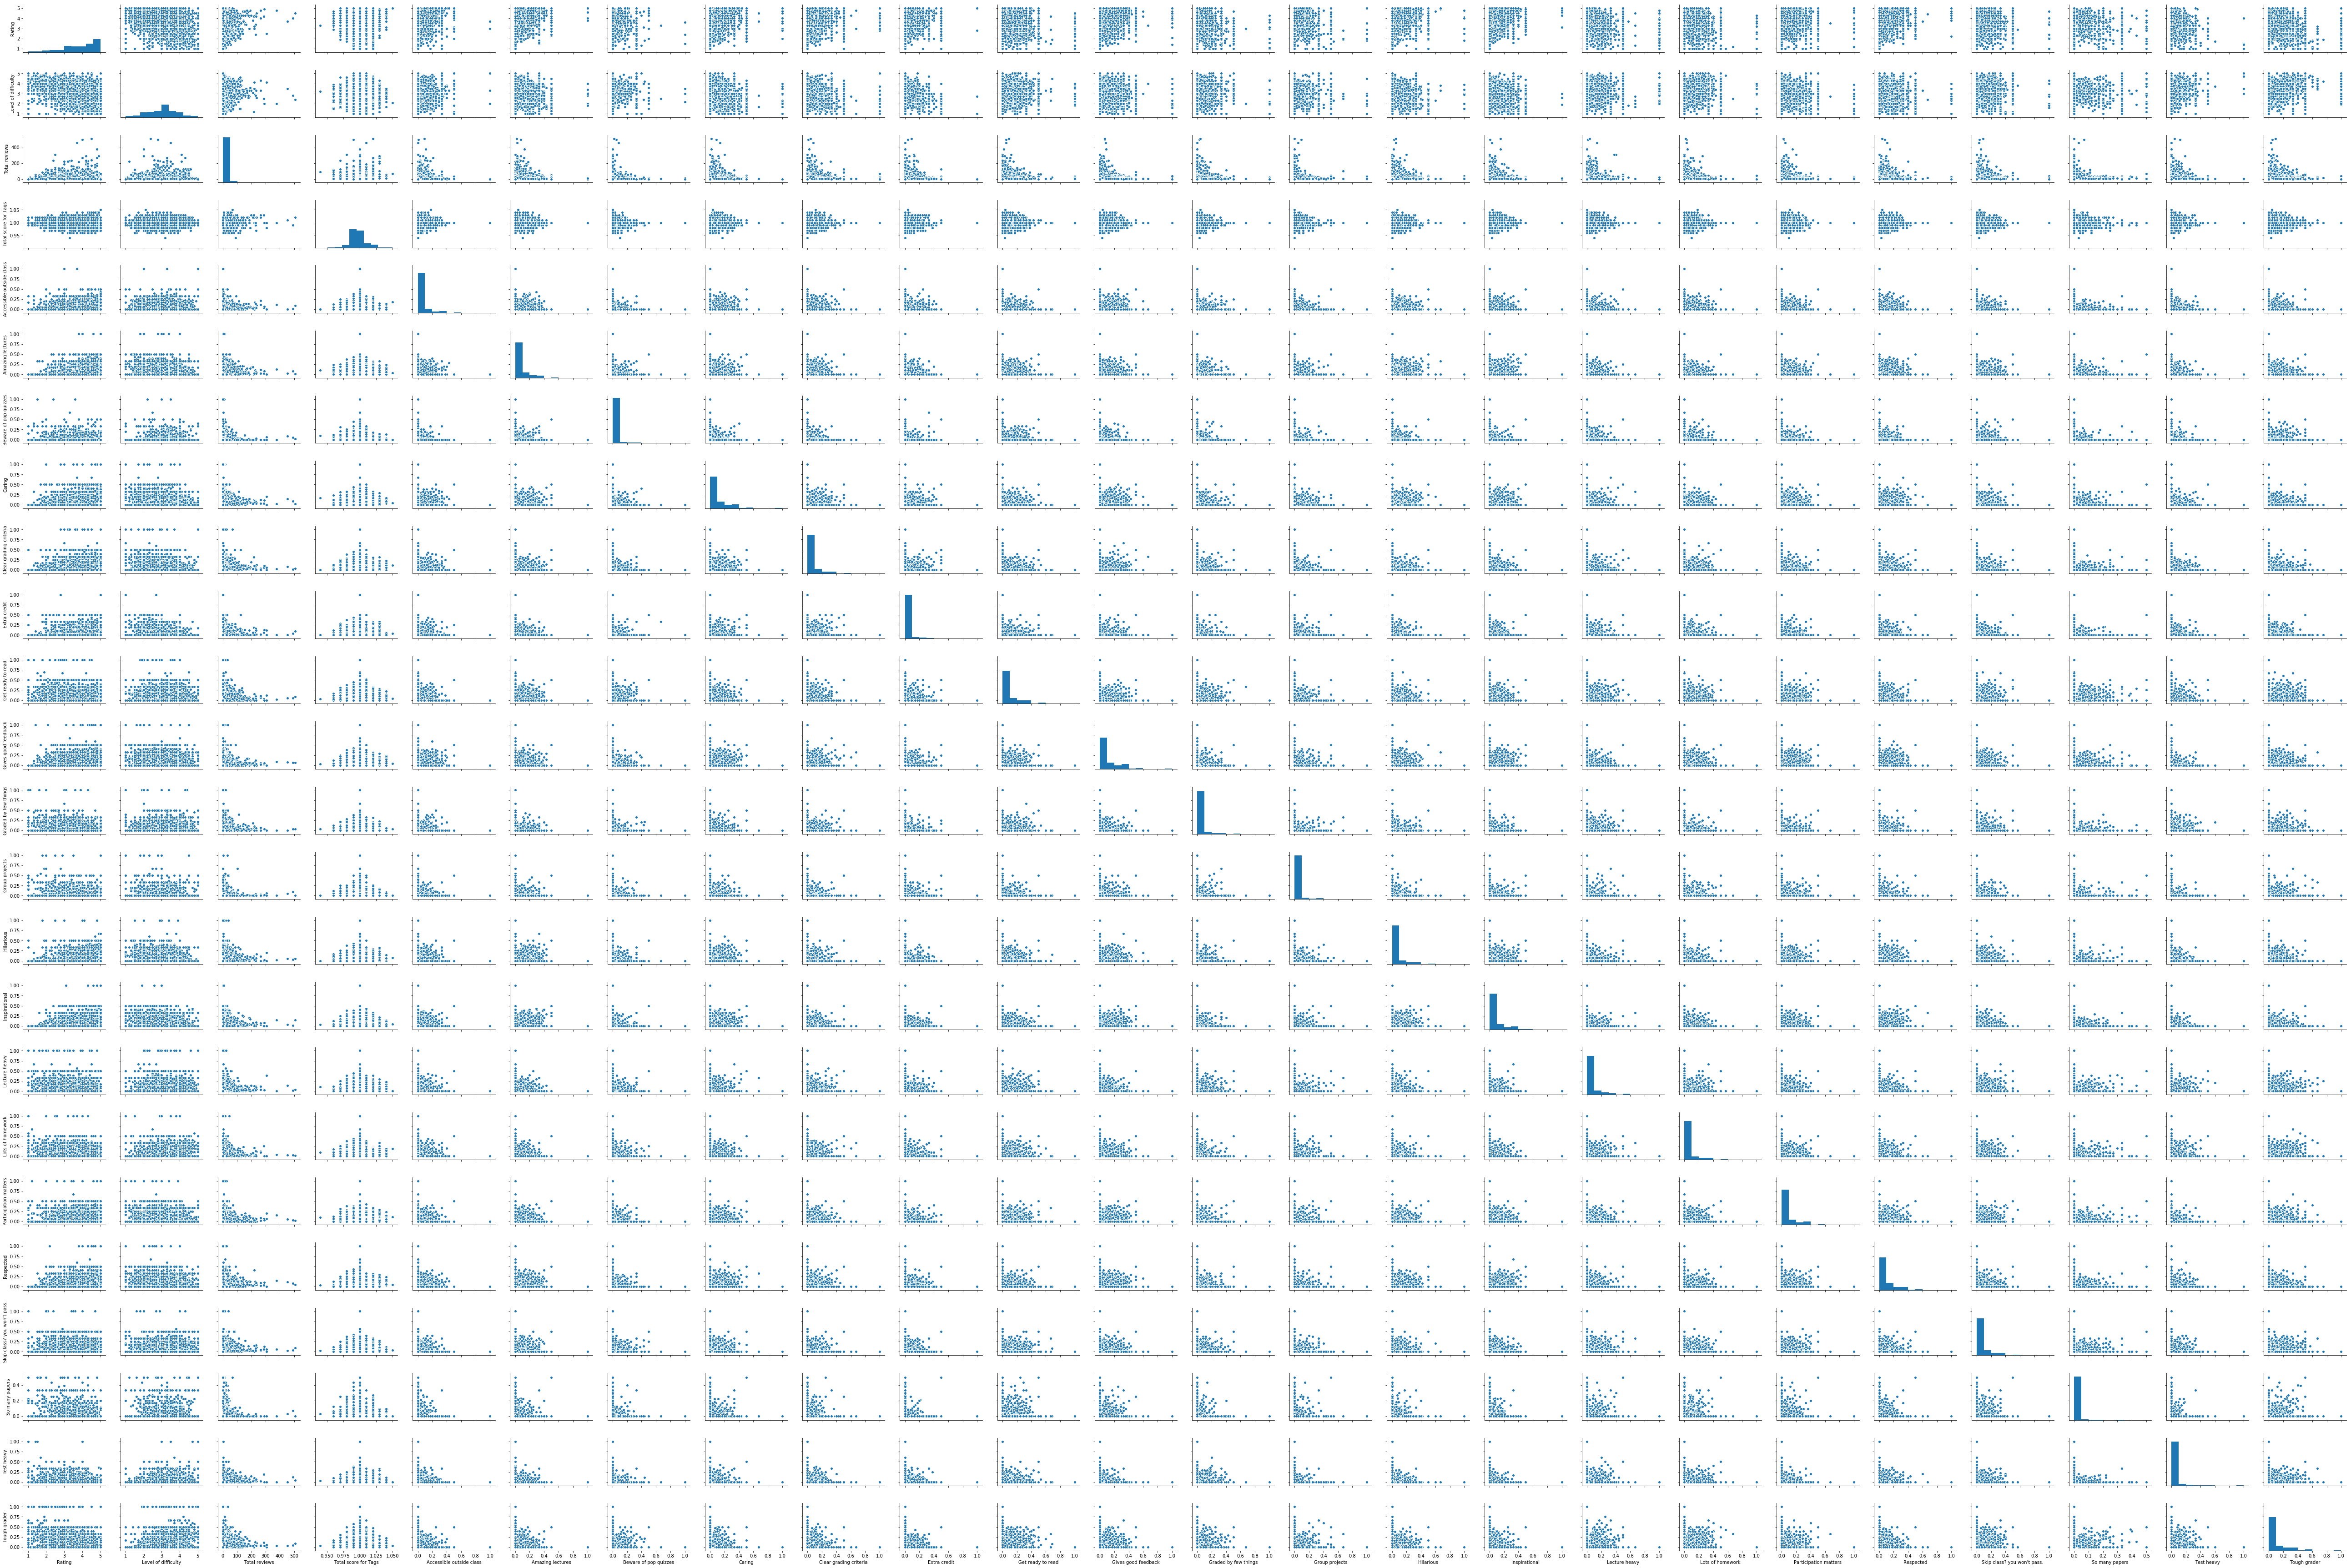

In [60]:
sns.pairplot(dfs_cleaned, size = 2, aspect=1.5);

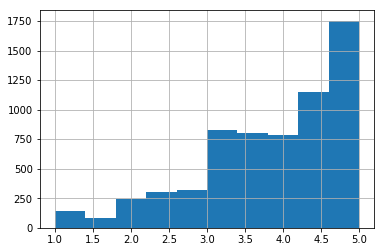

In [103]:
dfs_cleaned['Rating'].hist()

In [104]:
dfs_cleaned.columns

Index(['Name', 'Rating', 'Level of difficulty', 'Total reviews',
       'Total score for Tags', 'Accessible outside class', 'Amazing lectures',
       'Beware of pop quizzes', 'Caring', 'Clear grading criteria',
       'Extra credit', 'Get ready to read', 'Gives good feedback',
       'Graded by few things', 'Group projects', 'Hilarious', 'Inspirational',
       'Lecture heavy', 'Lots of homework', 'Participation matters',
       'Respected', 'Skip class? you won't pass.', 'So many papers',
       'Test heavy', 'Tough grader'],
      dtype='object')

In [105]:
# model 1-no constant, normal rating (no test, training split)

model=sm.OLS(dfs_cleaned.iloc[:,1], dfs_cleaned.iloc[:,2:])
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     8287.
Date:                Tue, 17 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:17:06   Log-Likelihood:                -7054.7
No. Observations:                6397   AIC:                         1.415e+04
Df Residuals:                    6375   BIC:                         1.430e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Level of difficulty            -0.2287      0.012    -18.548      0.000      -0.253      -0.205
Total reviews                  -0.0009      0.000     -2.302      0.021      -0.002      -0.000
Total score for Tags            4.1244      0.039    106.747      0.000       4.049       4.200
Accessible outside class        1.2006      0.103     11.685      0.000       0.999       1.402
Amazing lectures                1.6088      0.081     19.769      0.000       1.449       1.768
Beware of pop quizzes          -0.3022      0.167     -1.811      0.070      -0.629       0.025
Caring                          1.0637      0.068     15.712      0.000       0.931       1.196
Clear grading criteria          0.7550      0.083      9.144      0.000       0.593       0.917
Extra credit                    0.4749      0.130      3.640      0.000       0.219       0.731
Get ready to read              -0.0864      0.067     -1.286      0.198      -0.218       0.045
Gives good feedback             1.3412      0.066     20.282      0.000       1.212       1.471
Graded by few things           -1.0380      0.105     -9.924      0.000      -1.243      -0.833
Group projects                 -0.4704      0.110     -4.262      0.000      -0.687      -0.254
Hilarious                       0.8276      0.087      9.545      0.000       0.658       0.998
Inspirational                   1.0700      0.083     12.837      0.000       0.907       1.233
Lecture heavy                  -0.7081      0.077     -9.201      0.000      -0.859      -0.557
Lots of homework               -0.4400      0.084     -5.249      0.000      -0.604      -0.276
Participation matters           0.5490      0.071      7.705      0.000       0.409       0.689
Respected                       1.1519      0.073     15.698      0.000       1.008       1.296
Skip class? you won't pass.     0.1716      0.080      2.136      0.033       0.014       0.329
So many papers                 -1.0995      0.158     -6.951      0.000      -1.410      -0.789
Test heavy                     -1.0662      0.149     -7.179      0.000      -1.357      -0.775
Tough grader                   -0.8788      0.065    -13.592      0.000      -1.006      -0.752
==============================================================================
Omnibus:                      329.894   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              399.022
Skew:                          -0.541   Prob(JB):                     2.26e-87
Kurtosis:                       3.573   Cond. No.                     2.76e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The sm

In [106]:
# mode 2-with constant, normal rating (no test, training split)
model2=sm.OLS(dfs_cleaned.iloc[:,1], sm.add_constant(dfs_cleaned.iloc[:,2:]))
fit2=model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     229.8
Date:                Tue, 17 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:17:13   Log-Likelihood:                -7029.6
No. Observations:                6397   AIC:                         1.411e+04
Df Residuals:                    6374   BIC:                         1.426e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           5.9486      0.840      7.086      0.000       4.303       7.594
Level of difficulty            -0.2337      0.012    -18.997      0.000      -0.258      -0.210
Total reviews                  -0.0006      0.000     -1.638      0.102      -0.001       0.000
Total score for Tags           -1.5457      0.801     -1.929      0.054      -3.116       0.025
Accessible outside class        0.9181      0.110      8.359      0.000       0.703       1.133
Amazing lectures                1.3328      0.090     14.819      0.000       1.156       1.509
Beware of pop quizzes          -0.6011      0.172     -3.504      0.000      -0.937      -0.265
Caring                          0.7714      0.079      9.757      0.000       0.616       0.926
Clear grading criteria          0.4781      0.091      5.250      0.000       0.300       0.657
Extra credit                    0.1913      0.136      1.407      0.160      -0.075       0.458
Get ready to read              -0.3677      0.078     -4.724      0.000      -0.520      -0.215
Gives good feedback             1.0523      0.077     13.582      0.000       0.900       1.204
Graded by few things           -1.3251      0.112    -11.853      0.000      -1.544      -1.106
Group projects                 -0.7586      0.117     -6.471      0.000      -0.988      -0.529
Hilarious                       0.5509      0.095      5.812      0.000       0.365       0.737
Inspirational                   0.7700      0.093      8.261      0.000       0.587       0.953
Lecture heavy                  -0.9852      0.086    -11.447      0.000      -1.154      -0.816
Lots of homework               -0.7202      0.092     -7.794      0.000      -0.901      -0.539
Participation matters           0.2578      0.082      3.143      0.002       0.097       0.419
Respected                       0.8731      0.083     10.517      0.000       0.710       1.036
Skip class? you won't pass.    -0.1150      0.090     -1.283      0.199      -0.291       0.061
So many papers                 -1.3956      0.163     -8.561      0.000      -1.715      -1.076
Test heavy                     -1.3234      0.152     -8.688      0.000      -1.622      -1.025
Tough grader                   -1.1494      0.075    -15.351      0.000      -1.296      -1.003
==============================================================================
Omnibus:                      345.652   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.013
Skew:                          -0.555   Prob(JB):                     3.79e-92
Kurtosis:                       3.588   Cond. No.                     2.57e+16
==============================================================================

Warnings:
[1] St

In [107]:
dfs_cleaned.insert(1,'Rating-log',np.log(dfs_cleaned['Rating']))


In [108]:
dfs_cleaned.head()

Name  Rating-log  Rating  Level of difficulty  \
berkely 1   Chris Dolder    1.568616     4.8                  3.9   
        2   Bob Calonico    1.547563     4.7                  1.6   
        4    Mary Kelsey    1.526056     4.6                  1.6   
        5    John Searle    1.280934     3.6                  3.1   
        8  William Hanks    1.481605     4.4                  2.2   

           Total reviews  Total score for Tags  Accessible outside class  \
berkely 1              9                  1.00                      0.00   
        2             29                  1.00                      0.05   
        4             63                  1.03                      0.04   
        5             47                  0.98                      0.00   
        8             25                  0.99                      0.00   

           Amazing lectures  Beware of pop quizzes  Caring      ...       \
berkely 1              0.00                    0.0    0.00      ...        
        2              0.00                    0.0    0.26      ...        
        4              0.04                    0.0    0.12      ...        
        5              0.21                    0.0    0.07      ...        
        8              0.33                    0.0    0.00      ...        

           Hilarious  Inspirational  Lecture heavy  Lots of homework  \
berkely 1       0.00           0.50           0.00               0.0   
        2       0.26           0.32           0.00               0.0   
        4       0.00           0.08           0.04               0.0   
        5       0.21           0.07           0.00               0.0   
        8       0.00           0.33           0.00               0.0   

           Participation matters  Respected  Skip class? you won't pass.  \
berkely 1                   0.00       0.00                         0.00   
        2                   0.00       0.11                         0.00   
        4                   0.08       0.12                         0.04   
        5                   0.00       0.21                         0.00   
        8                   0.00       0.00                         0.33   

           So many papers  Test heavy  Tough grader  
berkely 1             0.0         0.0          0.00  
        2             0.0         0.0          0.00  
        4             0.0         0.0          0.04  
        5             0.0         0.0          0.07  
        8             0.0         0.0          0.00  

[5 rows x 26 columns]

In [109]:
dfs_log=dfs_cleaned.drop(['Rating', 'Total score for Tags'], axis=1)

In [110]:
dfs_log.columns

Index(['Name', 'Rating-log', 'Level of difficulty', 'Total reviews',
       'Accessible outside class', 'Amazing lectures', 'Beware of pop quizzes',
       'Caring', 'Clear grading criteria', 'Extra credit', 'Get ready to read',
       'Gives good feedback', 'Graded by few things', 'Group projects',
       'Hilarious', 'Inspirational', 'Lecture heavy', 'Lots of homework',
       'Participation matters', 'Respected', 'Skip class? you won't pass.',
       'So many papers', 'Test heavy', 'Tough grader'],
      dtype='object')

In [133]:
X1=dfs_log.iloc[:,2:]
y1=dfs_log.iloc[:,1]
X_train1, X_test1, y_train1, y_test1=train_test_split(X1, y1, test_size=0.8, random_state=8)

In [135]:
# mode3-no constant, log rating (no test, training split)

model3=sm.OLS(y_train1, X_train1)
fit3=model3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Rating-log   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1596.
Date:                Tue, 17 Jul 2018   Prob (F-statistic):               0.00
Time:                        16:04:30   Log-Likelihood:                -37.980
No. Observations:                1279   AIC:                             120.0
Df Residuals:                    1257   BIC:                             233.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Level of difficulty            -0.0873      0.010     -8.956      0.000      -0.106      -0.068
Total reviews                   0.0003      0.000      0.915      0.360      -0.000       0.001
Accessible outside class        1.8159      0.085     21.350      0.000       1.649       1.983
Amazing lectures                1.9495      0.070     27.804      0.000       1.812       2.087
Beware of pop quizzes           1.2529      0.121     10.395      0.000       1.016       1.489
Caring                          1.8520      0.058     32.048      0.000       1.739       1.965
Clear grading criteria          1.6713      0.067     25.109      0.000       1.541       1.802
Extra credit                    1.5534      0.097     16.056      0.000       1.364       1.743
Get ready to read               1.3717      0.061     22.518      0.000       1.252       1.491
Gives good feedback             1.7520      0.057     30.950      0.000       1.641       1.863
Graded by few things            1.0593      0.077     13.759      0.000       0.908       1.210
Group projects                  1.2509      0.087     14.399      0.000       1.080       1.421
Hilarious                       1.5765      0.079     19.990      0.000       1.422       1.731
Inspirational                   1.7323      0.068     25.381      0.000       1.598       1.866
Lecture heavy                   1.3213      0.064     20.764      0.000       1.196       1.446
Lots of homework                1.3534      0.071     18.999      0.000       1.214       1.493
Participation matters           1.6092      0.058     27.655      0.000       1.495       1.723
Respected                       1.8499      0.064     28.858      0.000       1.724       1.976
Skip class? you won't pass.     1.5493      0.067     23.219      0.000       1.418       1.680
So many papers                  0.9131      0.132      6.912      0.000       0.654       1.172
Test heavy                      1.1015      0.109     10.149      0.000       0.889       1.314
Tough grader                    1.1091      0.063     17.563      0.000       0.985       1.233
==============================================================================
Omnibus:                      362.911   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1207.692
Skew:                          -1.379   Prob(JB):                    5.66e-263
Kurtosis:                       6.880   Cond. No.                         538.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
# # mode4-with constant, log rating (no test, training split)
model2=sm.OLS(dfs_log.iloc[:,1], sm.add_constant(dfs_log.iloc[:,2:]))
fit2=model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Rating-log   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     203.3
Date:                Tue, 17 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:17:50   Log-Likelihood:                -95.685
No. Observations:                6397   AIC:                             237.4
Df Residuals:                    6374   BIC:                             392.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.8731      0.284      6.596      0.000       1.316       2.430
Level of difficulty            -0.0778      0.004    -18.687      0.000      -0.086      -0.070
Total reviews                   0.0002      0.000      1.787      0.074   -2.23e-05       0.000
Accessible outside class       -0.0994      0.287     -0.347      0.729      -0.661       0.463
Amazing lectures                0.0148      0.285      0.052      0.959      -0.545       0.574
Beware of pop quizzes          -0.5921      0.291     -2.034      0.042      -1.163      -0.021
Caring                         -0.1468      0.286     -0.514      0.607      -0.707       0.413
Clear grading criteria         -0.2091      0.285     -0.733      0.464      -0.769       0.350
Extra credit                   -0.3222      0.288     -1.119      0.263      -0.886       0.242
Get ready to read              -0.4659      0.285     -1.633      0.102      -1.025       0.093
Gives good feedback            -0.0555      0.286     -0.194      0.846      -0.615       0.504
Graded by few things           -0.8199      0.287     -2.858      0.004      -1.382      -0.258
Group projects                 -0.6391      0.287     -2.225      0.026      -1.202      -0.076
Hilarious                      -0.2176      0.286     -0.762      0.446      -0.777       0.342
Inspirational                  -0.1577      0.287     -0.550      0.582      -0.720       0.404
Lecture heavy                  -0.6977      0.285     -2.446      0.014      -1.257      -0.138
Lots of homework               -0.6101      0.286     -2.135      0.033      -1.170      -0.050
Participation matters          -0.3044      0.286     -1.065      0.287      -0.865       0.256
Respected                      -0.1095      0.285     -0.384      0.701      -0.669       0.450
Skip class? you won't pass.    -0.3984      0.286     -1.393      0.164      -0.959       0.162
So many papers                 -0.8804      0.290     -3.032      0.002      -1.450      -0.311
Test heavy                     -0.8392      0.288     -2.912      0.004      -1.404      -0.274
Tough grader                   -0.7631      0.285     -2.679      0.007      -1.322      -0.205
==============================================================================
Omnibus:                     1728.317   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5559.020
Skew:                          -1.366   Prob(JB):                         0.00
Kurtosis:                       6.660   Cond. No.                     1.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The co

In [113]:
dfs_log.corr()

Rating-log  Level of difficulty  Total reviews  \
Rating-log                     1.000000            -0.375558      -0.007354   
Level of difficulty           -0.375558             1.000000       0.014876   
Total reviews                 -0.007354             0.014876       1.000000   
Accessible outside class       0.123002             0.011444      -0.003302   
Amazing lectures               0.237177            -0.067806       0.027611   
Beware of pop quizzes         -0.074388             0.016116      -0.001279   
Caring                         0.239960            -0.184561      -0.052789   
Clear grading criteria         0.096468            -0.134652       0.016303   
Extra credit                   0.026990            -0.116888       0.030910   
Get ready to read             -0.144258             0.098086       0.012670   
Gives good feedback            0.237229            -0.068166      -0.079719   
Graded by few things          -0.177983            -0.002193       0.017488   
Group projects                -0.097352            -0.020747      -0.037324   
Hilarious                      0.140951            -0.133699       0.034238   
Inspirational                  0.226956            -0.114353       0.004457   
Lecture heavy                 -0.231204             0.042949       0.030458   
Lots of homework              -0.200751             0.161438      -0.004850   
Participation matters          0.052629            -0.067748      -0.051395   
Respected                      0.239315            -0.110216       0.014193   
Skip class? you won't pass.   -0.119799             0.114091       0.035636   
So many papers                -0.162200             0.056784      -0.007806   
Test heavy                    -0.196067             0.131245       0.069169   
Tough grader                  -0.397150             0.349265       0.013734   

                             Accessible outside class  Amazing lectures  \
Rating-log                                   0.123002          0.237177   
Level of difficulty                          0.011444         -0.067806   
Total reviews                               -0.003302          0.027611   
Accessible outside class                     1.000000         -0.023943   
Amazing lectures                            -0.023943          1.000000   
Beware of pop quizzes                       -0.039026         -0.036401   
Caring                                       0.058698         -0.047234   
Clear grading criteria                       0.005547         -0.046115   
Extra credit                                 0.002474         -0.054599   
Get ready to read                           -0.110794         -0.110938   
Gives good feedback                          0.023557         -0.095709   
Graded by few things                        -0.018257         -0.065271   
Group projects                              -0.042039         -0.080526   
Hilarious                                   -0.029274          0.083567   
Inspirational                               -0.055100          0.170074   
Lecture heavy                               -0.063045         -0.119558   
Lots of homework                            -0.073728         -0.138215   
Participation matters                       -0.067117         -0.122595   
Respected                                   -0.044569          0.067569   
Skip class? you won't pass.                 -0.089109         -0.093561   
So many papers                              -0.059865         -0.067448   
Test heavy                                  -0.033350         -0.069527   
Tough grader                                -0.132471         -0.173362   

                             Beware of pop quizzes    Caring  \
Rating-log                               -0.074388  0.239960   
Level of difficulty                       0.016116 -0.184561   
Total reviews                            -0.001279 -0.052789   
Accessible outside class                 -0.039026  0.058698   
Amazing lec

In [114]:
from sklearn.linear_model import Lasso


In [126]:
X=dfs_log.iloc[:,2:]
y=dfs_log.iloc[:,1]

In [136]:
from sklearn.model_selection import GridSearchCV

In [153]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.8, random_state=8)
degree=2
alphas= 1e-5 #[1e-5, 1e-4, 1e-3,1e-2,1e-1]


est=make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alphas))


# est.fit(X_train, y_train)
# plt.plot(X_train, est.predict(X_train[:, np.newaxis]))

In [140]:
est.get_params().keys()

dict_keys(['memory', 'steps', 'polynomialfeatures', 'lasso', 'polynomialfeatures__degree', 'polynomialfeatures__include_bias', 'polynomialfeatures__interaction_only', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__normalize', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])

In [145]:
est.get_params().keys()
est.set_params(polynomialfeatures__degree=4)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [149]:
param_grid = {'lasso__alpha': np.linspace(0, 0.1, 100) , 'polynomialfeatures__degree': [1, 2]}
grid = GridSearchCV(est, param_grid, cv=3)
grid.fit(X_train, y_train)

/Users/xzhou/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:250: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/xzhou/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/xzhou/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/xzhou/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:250: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/Users

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'lasso__alpha': array([0.     , 0.00101, ..., 0.09899, 0.1    ]), 'polynomialfeatures__degree': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [152]:
grid.best_estimator_.get_params()['lasso'].coef_

array([ 0.00000000e+00,  1.34406463e-02,  1.75025261e-03,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -2.22651211e-02,
       -9.88406151e-04,  9.78191749e-02,  1.72734798e-01, -6.24451459e-02,
        1.22669338e-01,  7.82158554e-02,  0.00000000e+00, -2.82410380e-02,
        1.19260835e-01, -1.04396463e-01, -4.73730369e-02,  0.00000000e+00,
        8.93542676e-02, -5.62970144e-02, -3.56277335e-02,  2.29282885e-02,
        1.22524831e-01,  0.00000000e+00, -1.84921954e-01, -1.10468708e-01,
       -9.90443464e-02,  3.20132871e-06,  0.00000000e+00, -1.98044575e-03,
        1.01452386e-02, -2.32552071e-03, -5.15811570e-03,  3.17159357e-03,
        6.25080384e-04, -

In [150]:
grid.best_params_

{'lasso__alpha': 0.00101010101010101, 'polynomialfeatures__degree': 2}

In [130]:
X_train

Level of difficulty  Total reviews  Accessible outside class  \
nyu     1066                  2.2             26                      0.14   
berkely 1178                  3.7              3                      0.00   
        1922                  3.2             37                      0.00   
uf      5067                  4.5              2                      0.00   
        4433                  1.6              7                      0.00   
nyu     2759                  3.3              3                      0.00   
uf      1122                  4.2             56                      0.00   
nyu     3760                  1.0              1                      0.00   
        4594                  4.0              1                      0.00   
uf      4823                  4.0              1                      0.33   
        4803                  2.5              2                      0.17   
nyu     285                   3.6             22                      0.00   
berkely 1952                  3.7             15                      0.00   
        1664                  1.4             13                      0.17   
uf      3755                  3.4              5                      0.00   
        508                   3.7             46                      0.00   
nyu     1194                  4.0             25                      0.00   
uf      2711                  3.6              7                      0.00   
nyu     3816                  2.2             10                      0.14   
berkely 3740                  4.0              2                      0.00   
nyu     4249                  3.0              2                      0.00   
berkely 3773                  3.5              4                      0.00   
nyu     2946                  4.5              4                      0.00   
uf      4020                  2.8             10                      0.00   
nyu     330                   2.4             34                      0.00   
        1005                  2.8              5                      0.00   
berkely 1039                  2.4             17                      0.17   
        1394                  3.7             12                      0.00   
nyu     2596                  3.2             18                      0.00   
        4652                  3.9              7                      0.25   
...                           ...            ...                       ...   
        4812                  3.0              1                      0.00   
uf      2509                  2.8              5                      0.33   
        831                   3.9             14                      0.00   
berkely 2258                  2.8              6                      0.00   
uf      217                   3.8              4                      0.00   
berkely 649                   2.9              9                      0.33   
nyu     4421                  2.8              6                      0.00   
        4142                  3.4             89                      0.00   
uf      4015                  4.4              5                      0.00   
        5123                  2.0              1                      0.00   
berkely 3121                  3.7              3                      0.00   
uf      4780                  1.0              1                      0.00   
nyu     5561                  4.0              1                      0.00   
berkely 1705                  3.5              6                      0.00   
uf      1234                  3.8             19                      0.00   
berkely 1180                  2.7             25                      0.00   
nyu     5289                  4.0              1                      0.00   
uf      1980                  1.8             12                      0.00   
        3190                  4.0             11                      0.00   
        4751                  3.0   

In [57]:
# 'Beware of pop quizzes','Get ready to read','Graded by few things','Group projects','Lecture heavy', 'Lots of homework','Skip class? you won't pass.',

subset=['Rating','Level of difficulty', 'Total reviews',
       'Accessible outside class', 'Amazing lectures', 
       'Caring', 'Clear grading criteria', 'Extra credit', 
       'Gives good feedback',  
       'Hilarious', 'Inspirational', 
       'Participation matters', 'Respected', 
       'So many papers', 'Test heavy', 'Tough grader']

In [58]:
dfs_drill_down=dfs_cleaned[subset]
dfs_drill_down.shape

(6397, 16)

In [78]:
dfs_drill_down.iloc[:,0:3].head(20)

Rating  Level of difficulty  Total reviews
1      4.8                  3.9              9
2      4.7                  1.6             29
4      4.6                  1.6             63
5      3.6                  3.1             47
8      4.4                  2.2             25
10     4.2                  3.5             32
11     4.1                  2.7             22
15     4.5                  2.6            237
16     3.6                  3.4             10
18     4.4                  3.3             43
20     3.8                  3.0             18
23     3.8                  3.2             61
27     2.7                  3.6             35
30     4.3                  3.3             58
32     4.3                  2.5             22
34     3.6                  2.9             47
42     3.7                  2.8             36
46     3.5                  3.0            156
49     2.7                  3.2              8
50     3.7                  3.3             13

In [79]:
# no constant

model3=sm.OLS(dfs_drill_down.iloc[:,0], dfs_drill_down.iloc[:,1:])
fit3=model3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     6052.
Date:                Sun, 15 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:18:48   Log-Likelihood:                -9181.1
No. Observations:                6397   AIC:                         1.839e+04
Df Residuals:                    6382   BIC:                         1.849e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Level of difficulty          0.5384      0.010     53.319      0.000       0.519       0.558
Total reviews                0.0025      0.001      4.757      0.000       0.001       0.004
Accessible outside class     2.7905      0.150     18.585      0.000       2.496       3.085
Amazing lectures             3.6247      0.117     30.934      0.000       3.395       3.854
Caring                       3.4985      0.094     37.161      0.000       3.314       3.683
Clear grading criteria       3.4604      0.117     29.471      0.000       3.230       3.691
Extra credit                 3.6664      0.187     19.574      0.000       3.299       4.034
Gives good feedback          3.3297      0.095     35.212      0.000       3.144       3.515
Hilarious                    3.3345      0.124     26.930      0.000       3.092       3.577
Inspirational                3.1471      0.120     26.328      0.000       2.913       3.381
Participation matters        3.2174      0.104     31.027      0.000       3.014       3.421
Respected                    3.3064      0.105     31.445      0.000       3.100       3.512
So many papers               1.5065      0.233      6.472      0.000       1.050       1.963
Test heavy                   0.6900      0.220      3.138      0.002       0.259       1.121
Tough grader                 0.6011      0.101      5.964      0.000       0.404       0.799
==============================================================================
Omnibus:                      126.537   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.449
Skew:                          -0.114   Prob(JB):                     1.37e-53
Kurtosis:                       3.928   Cond. No.                         526.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
dfs_drill_down.corr()

Rating  Level of difficulty  Total reviews  \
Rating                    1.000000            -0.380945      -0.041710   
Level of difficulty      -0.380945             1.000000       0.014876   
Total reviews            -0.041710             0.014876       1.000000   
Accessible outside class  0.129633             0.011444      -0.003302   
Amazing lectures          0.254154            -0.067806       0.027611   
Caring                    0.252771            -0.184561      -0.052789   
Clear grading criteria    0.088719            -0.134652       0.016303   
Extra credit              0.023843            -0.116888       0.030910   
Gives good feedback       0.249723            -0.068166      -0.079719   
Hilarious                 0.147909            -0.133699       0.034238   
Inspirational             0.242962            -0.114353       0.004457   
Participation matters     0.053646            -0.067748      -0.051395   
Respected                 0.249245            -0.110216       0.014193   
So many papers           -0.159816             0.056784      -0.007806   
Test heavy               -0.199749             0.131245       0.069169   
Tough grader             -0.405891             0.349265       0.013734   

                          Accessible outside class  Amazing lectures  \
Rating                                    0.129633          0.254154   
Level of difficulty                       0.011444         -0.067806   
Total reviews                            -0.003302          0.027611   
Accessible outside class                  1.000000         -0.023943   
Amazing lectures                         -0.023943          1.000000   
Caring                                    0.058698         -0.047234   
Clear grading criteria                    0.005547         -0.046115   
Extra credit                              0.002474         -0.054599   
Gives good feedback                       0.023557         -0.095709   
Hilarious                                -0.029274          0.083567   
Inspirational                            -0.055100          0.170074   
Participation matters                    -0.067117         -0.122595   
Respected                                -0.044569          0.067569   
So many papers                           -0.059865         -0.067448   
Test heavy                               -0.033350         -0.069527   
Tough grader                             -0.132471         -0.173362   

                            Caring  Clear grading criteria  Extra credit  \
Rating                    0.252771                0.088719      0.023843   
Level of difficulty      -0.184561               -0.134652     -0.116888   
Total reviews            -0.052789                0.016303      0.030910   
Accessible outside class  0.058698                0.005547      0.002474   
Amazing lectures         -0.047234               -0.046115     -0.054599   
Caring                    1.000000               -0.019839     -0.016292   
Clear grading criteria   -0.019839                1.000000      0.067416   
Extra credit             -0.016292                0.067416      1.000000   
Gives good feedback       0.034216               -0.029826     -0.074685   
Hilarious                -0.020104               -0.068468     -0.032465   
Inspirational             0.030745               -0.127442     -0.066709   
Participation matters    -0.067133               -0.094901     -0.070224   
Respected                 0.003686               -0.066919     -0.075613   
So many papers           -0.086959               -0.056869     -0.027076   
Test heavy               -0.093148               -0.003598      0.003203   
Tough grader             -0.221018               -0.127152     -0.076455   

                          Gives good feedback  Hilarious  Inspirational  \
Rating                               0.249723   0.147909       0.242962   
Level of difficulty                 -0.068166  -0.133699      -0.114353   
Total reviews             

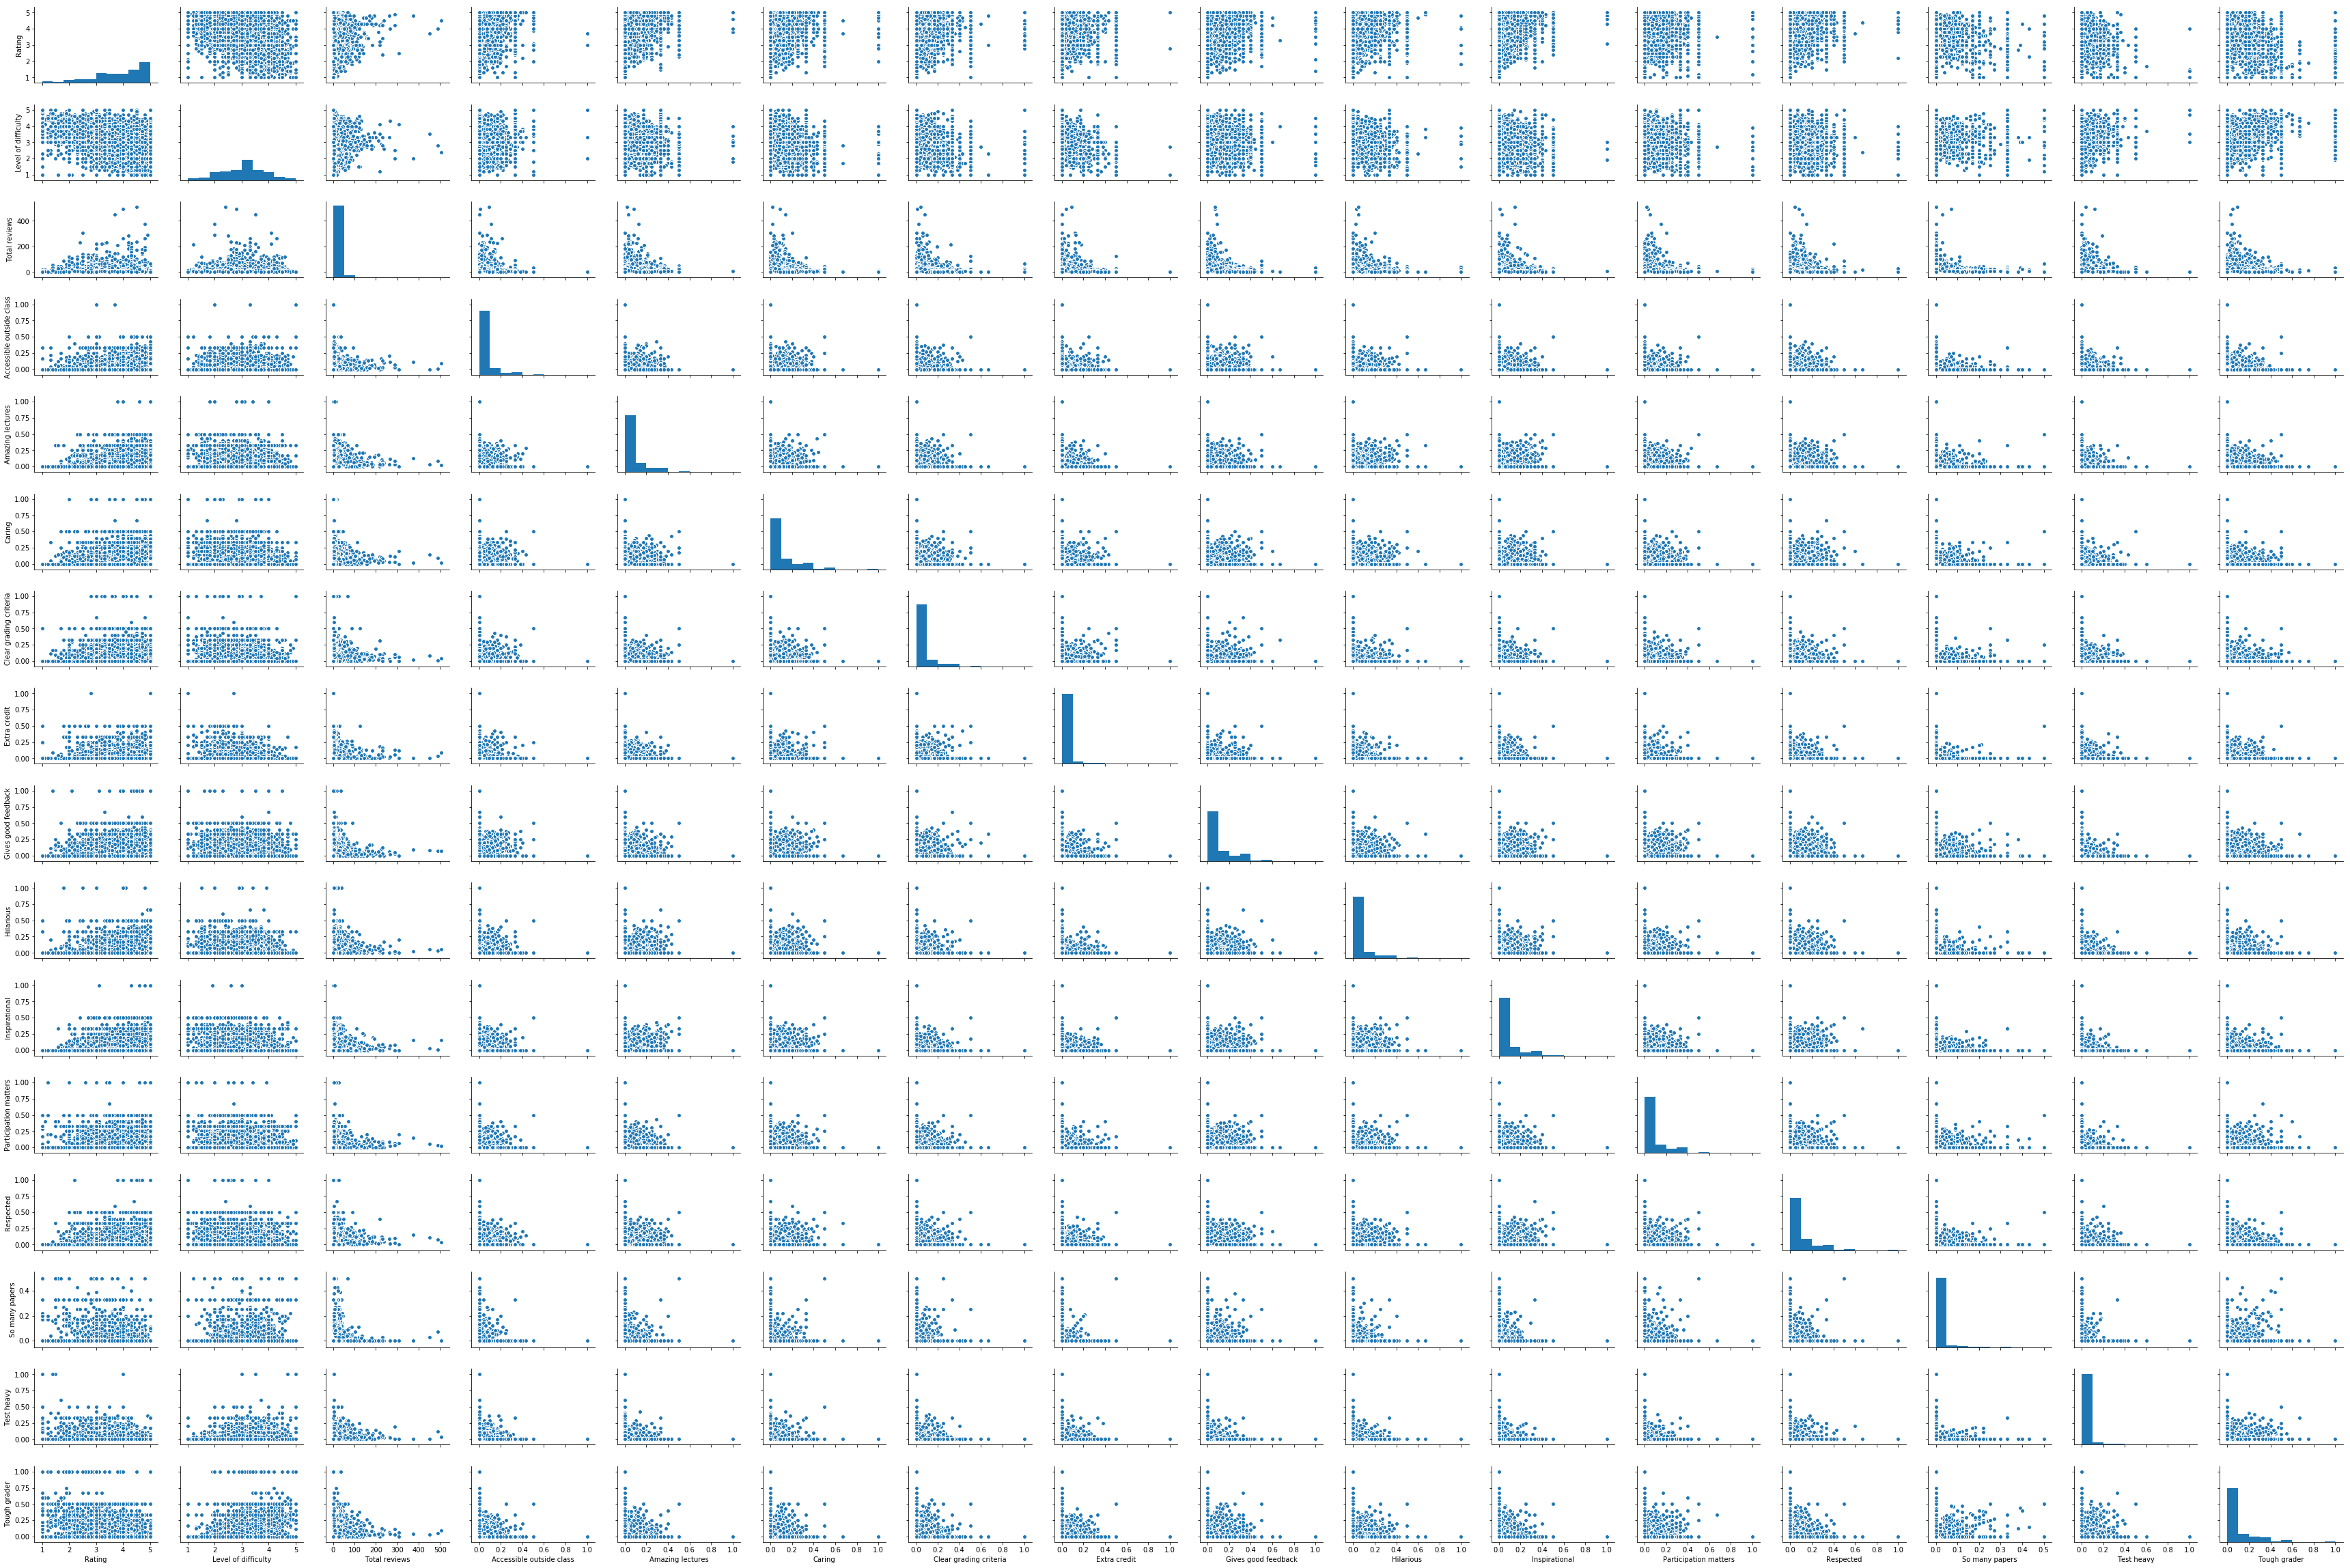

In [84]:
sns.pairplot(dfs_drill_down, size = 2, aspect=1.5);

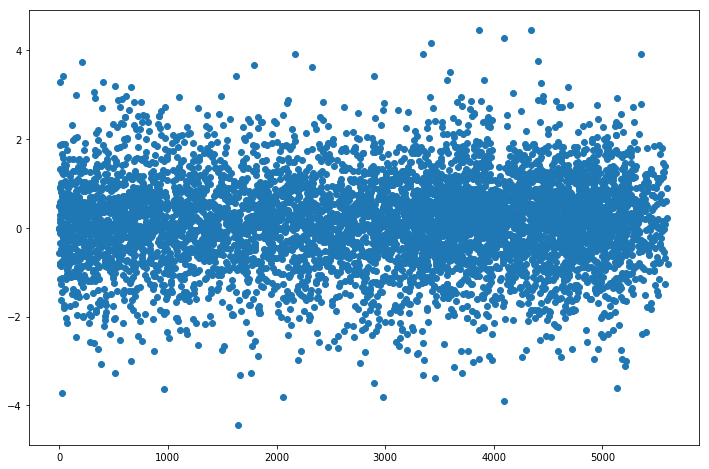

In [81]:
fit3.resid.plot(style='o', figsize=(12,8));

In [22]:
#diagnostic_plots.diagnostic_plots(df_drill_down.drop('rating', axis=1), df_drill_down['rating'], fit1)

In [83]:
lr=LinearRegression()
X=dfs_cleaned.iloc[:,2:]
y=dfs_cleaned.iloc[:,1]
lr.fit(X, y)
lr.score(X, y)


0.4422751981769201

In [86]:
from IPython.core.pylabtools import figsize

ValueError: x and y must be the same size

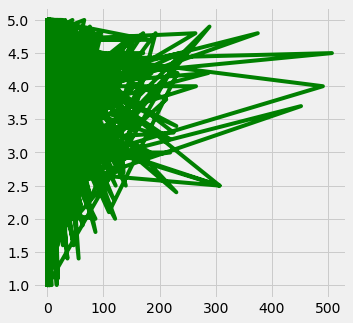

In [88]:

figsize(5,5)
plt.style.use('fivethirtyeight')

X = dfs_cleaned.iloc[:, 2:]

y = dfs_cleaned.iloc[:,1]

# x plot is random generated 100 number, and f(x_plot) is function transformation of x, and represents ground true
#. x is ran dome generated number, and y is function transformatoin with noise/error term

# Plot the training data against what we know to be the ground truth sin function
fig,ax = plt.subplots(1,1);
ax.plot(X, y, label='pattern', color='green')
ax.scatter(X, y, label='data', s=100)
ax.set_ylim((-2, 2))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

In [24]:
# import PolynomialFeatures and make_pipeline for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Plot the results of a pipeline against ground truth and actual data
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    #ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y)
    #ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

ValueError: x and y must be the same size

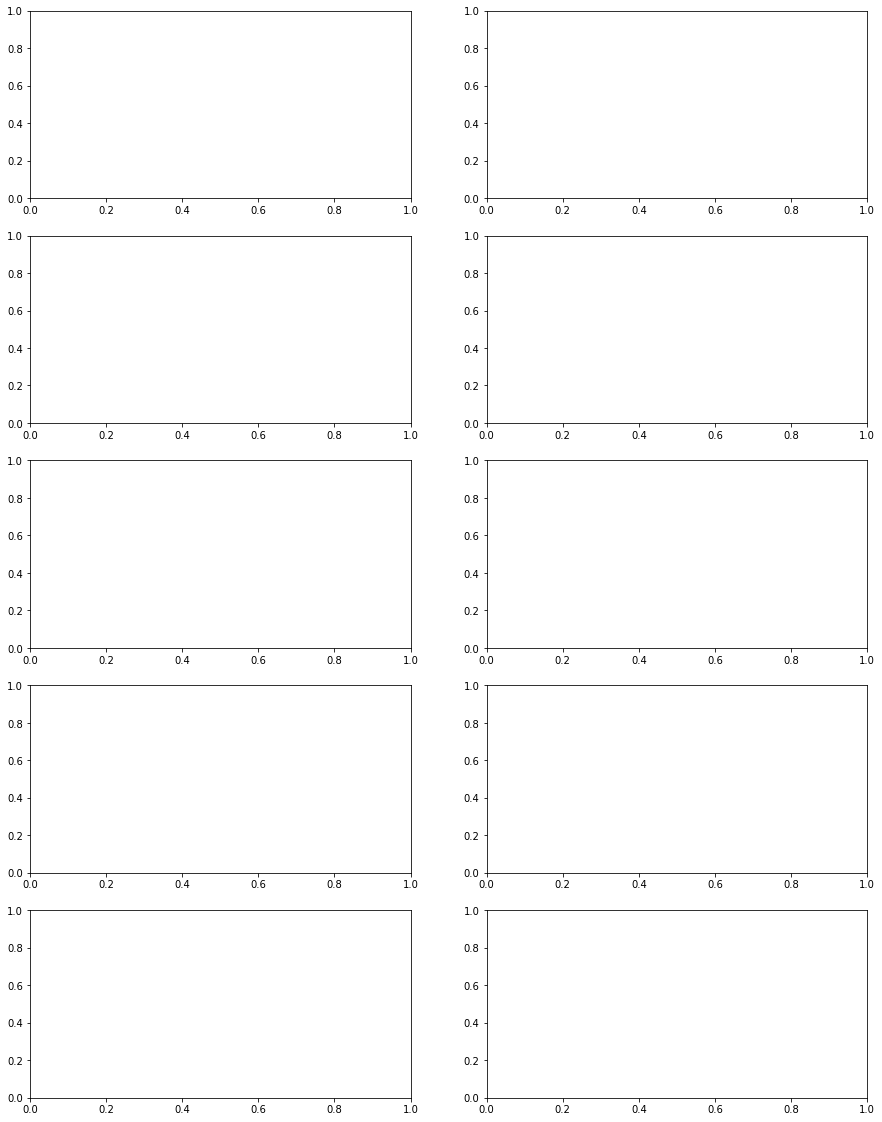

In [25]:
# Step through degrees from 0 to 9 and store the training and test (generalization) error.
# This sets up 5 rows of 2 plots each (KEEP)
fig, ax_rows = plt.subplots(5, 2, figsize=(15, 20))
for degree in range(10):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X, y)
    # This sets the appropriate axis for each degree (KEEP)
    ax_row_left, ax_row_right = ax_rows[degree//2]
    if degree%2 == 0:
        ax = ax_row_left
    else:
        ax = ax_row_right
    plot_approximation(est, ax, label='degree=%d' % degree)

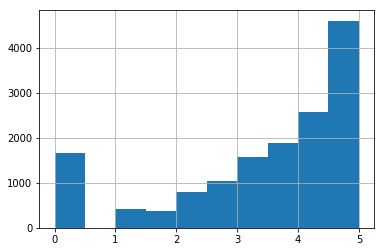

In [30]:
dfs['Rating'].hist()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1c2191fd90> (for post_execute):


TypeError: cannot convert the series to <class 'float'>

TypeError: cannot convert the series to <class 'float'>

<Figure size 432x288 with 1 Axes>

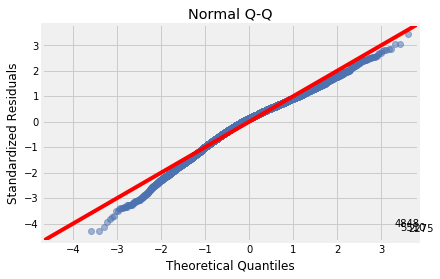

TypeError: cannot convert the series to <class 'float'>

<Figure size 432x288 with 1 Axes>

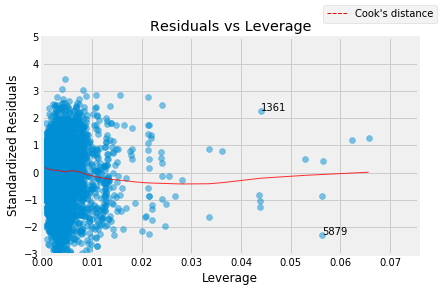

In [92]:
diagnostic_plots.diagnostic_plots(dfs_cleaned.drop(['Name','Rating'], axis=1), dfs_cleaned['Rating'], fit)